# clasificación

Importamos librerias que vamos a utilizar posteriormente

In [1]:
import pandas as pd
import numpy  as np  
import matplotlib.pyplot as plt # para dibujar
%matplotlib inline
import graphviz
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')



cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Ponemos las funciones que vamos a utilizar a lo largo de la práctica

In [2]:
# definimos una función para representar el resultado del ajuste. Dibuja una frontera de separación
def plot_decision_boundary(X,y,h,model):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .05  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Zd = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Zd = Zd.reshape(xx.shape)
    
    Zp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] 
    Zp = Zp.reshape(xx.shape)
    
    # Error de clasificación
    ypred = model.predict(X)
    acc = accuracy_score(y,ypred)
    
    plt.figure(1, figsize=(12, 5))
    
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.contour(xx, yy, Zd, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zd,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'FRONTERA DECISION\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    #plt.contour(xx, yy, Zp, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zp,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'PROBABILIDAD\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.tight_layout()
    plt.show()

In [3]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [4]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

# ejecute esta celda
def miRegresionLineal(x_i,y_i,x,y,degree):
    poly = PolynomialFeatures(degree)
    X_i  = poly.fit_transform(x_i.reshape(-1, 1))
    X_test = poly.fit_transform(x.reshape(-1, 1))
    lr     = LinearRegression().fit(X_i,y_i)
    
    y_hat = lr.predict(X_i)
    fw = lr.predict(X_test)
    
    error_train = np.mean(np.power(y_i-y_hat,2)) 
    error_test  = np.mean(np.power(y-fw,2)) 
    
   # print(lr.coef_)
    
    return fw, error_test, error_train

Importamos dataset

In [6]:
census = pd.read_csv("../Práctica/census.csv") 
census.head(5)                              

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


Obtenemos las filas y columnas del dataset

In [7]:
census.shape

(45222, 14)

Obtenemos los nombres de las columnas

In [8]:
census.columns.values

array(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

Comprobamos si tenemos missing values

In [9]:
print(pd.notnull(census['age']).values.ravel().sum())
print(pd.notnull(census['workclass']).values.ravel().sum())
print(pd.notnull(census['education_level']).values.ravel().sum())
print(pd.notnull(census['education-num']).values.ravel().sum())
print(pd.notnull(census['marital-status']).values.ravel().sum())
print(pd.notnull(census['occupation']).values.ravel().sum())
print(pd.notnull(census['relationship']).values.ravel().sum())
print(pd.notnull(census['race']).values.ravel().sum())
print(pd.notnull(census['capital-gain']).values.ravel().sum())
print(pd.notnull(census['capital-loss']).values.ravel().sum())
print(pd.notnull(census['hours-per-week']).values.ravel().sum())
print(pd.notnull(census['native-country']).values.ravel().sum())
print(pd.notnull(census['income']).values.ravel().sum())

45222
45222
45222
45222
45222
45222
45222
45222
45222
45222
45222
45222
45222


Podemos observar que no tenemos NAs

Convertimos los tipos string en variables categóricas

In [10]:
le = LabelEncoder()
census['workclass'] = le.fit_transform(census['workclass'])
census['education_level'] = le.fit_transform(census['education_level'])
census['workclass'] = le.fit_transform(census['workclass'])
census['education_level'] = le.fit_transform(census['education_level'])
census['marital-status'] = le.fit_transform(census['marital-status'])
census['occupation'] = le.fit_transform(census['occupation'])
census['relationship'] = le.fit_transform(census['relationship'])
census['race'] = le.fit_transform(census['race'])
census['sex'] = le.fit_transform(census['sex'])
census['native-country'] = le.fit_transform(census['native-country'])
census['income'] = le.fit_transform(census['income'])

In [11]:
census.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0


Vamos a ver los estadísticos para comprobar si todo tiene coherencia

In [12]:
census.describe()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,2.204502,10.313321,10.118460,2.585180,5.969572,1.412697,3.680288,0.675048,1101.430344,88.595418,40.938017,36.401022,0.247844
std,13.217870,0.958122,3.817014,2.552881,1.500458,4.026400,1.597227,0.832353,0.468362,7506.430084,404.956092,12.007508,6.079856,0.431766
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


Observamos que se trata de un problema de clasificación al ver la variable targer, de todas formas si dibujamos el histograma de la misma lo veremos más claro

(array([34014.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11208.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

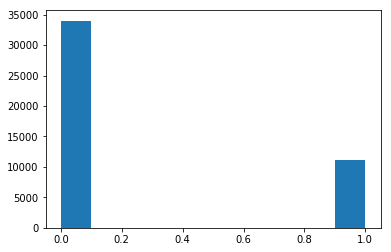

In [13]:
plt.hist(census['income'])

Calculamos desbalanceo y su ratio

In [14]:
census['income'].value_counts()

0    34014
1    11208
Name: income, dtype: int64

In [15]:
census['income'].value_counts()/census.shape[0]

0    0.752156
1    0.247844
Name: income, dtype: float64

Vemos que es un problema de clasificación con cierto desbalanceo pero no exagerado. Utilizaremos diferentes técnicas que nos permitirán disminuir la problemática que supone en GridSearchCV como class_weight.

A continuación, vamos a dibujar el histograma para cada una de las features

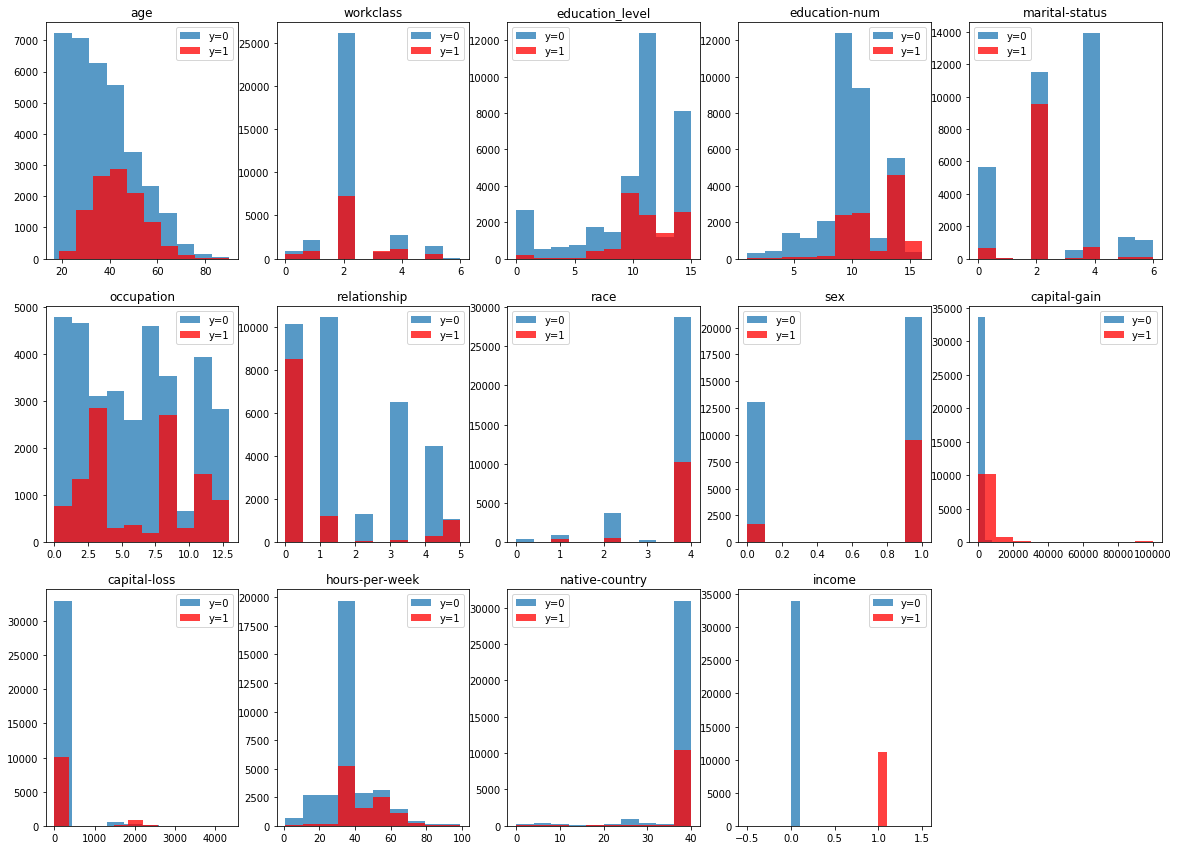

In [16]:
plt.figure(figsize=(20,20))

idx_0 = census['income'] == 0
idx_1 = census['income'] == 1


for i, feature in enumerate(census.columns):
    plt.subplot(4,5,i+1)
    plt.hist(census.loc[idx_0,feature], normed=0,alpha=0.75,label='y=0')
    plt.hist(census.loc[idx_1,feature], normed=0,facecolor = 'red',alpha=0.75, label='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

CORRELACIÓN ENTRE LAS VARIABLES

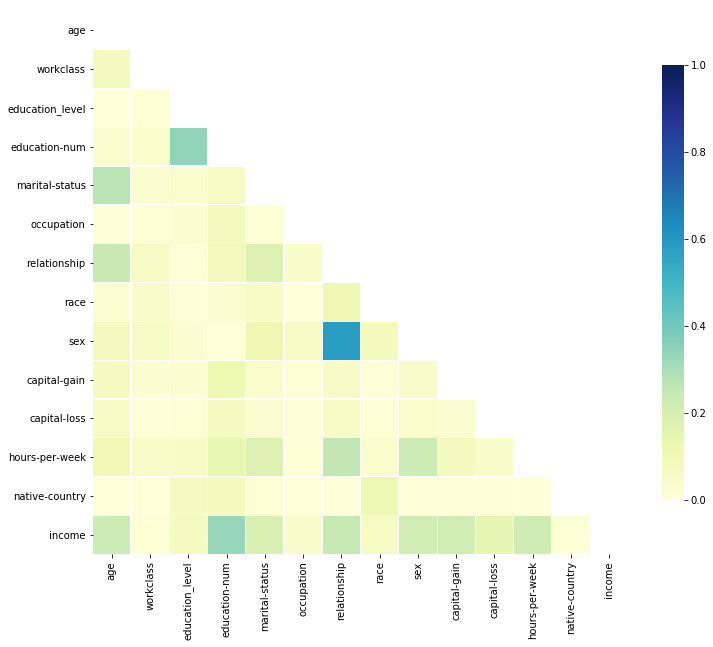

In [17]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs((census).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

DIBUJAR CORRELACIÓN MAYOR AL 95% ENTRE VARIABLES (PARA QUITAR FEATURES)

In [18]:
# Create correlation matrix
corr_matrix = census.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
pairs = np.where(upper>0.95)
fx = census.columns[pairs[0]]
fy = census.columns[pairs[1]]

i=1
plt.figure(figsize=(22,4))
for f1,f2 in zip(fx,fy):
    
    plt.subplot(1,5,i)
    
    plt.scatter(census[f1],census[f2], c=census['income'],cmap=cm_bright, alpha=0.25)
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.grid()
    plt.tight_layout()
    
    i+=1
    
plt.show()

<Figure size 1584x288 with 0 Axes>

Como se puede observar no existe ninguna variable que tenga una fuerte correlación con otra, por lo que no tenemos que proceder a eliminar ninguna.

#### REGRESION LOGÍSTICA


In [20]:
#preparamos datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = census.columns.drop(['income'])

X = census[features].as_matrix() 
y = census['income'].as_matrix()

#P1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

best mean cross-validation score: 0.620
best parameters: {'C': 0.1}


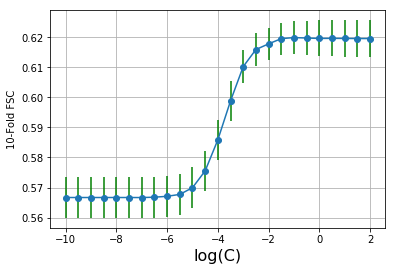

In [21]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-10, 2, 25)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(random_state = 0, class_weight = 'balanced'),
                    scoring = 'f1', 
                    param_grid = param_grid, 
                    cv = 5)

grid.fit(Xs_train,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC), scores, yerr = std_scores, fmt = 'o-', ecolor = 'g')
plt.xlabel('log(C)', fontsize = 16)
plt.ylabel('10-Fold FSC')
plt.grid()
plt.show()

Esta regresión logística tiene ya el proceso de regularización que después tendremos que aplicar de forma manual en regresión. Cuanto mayor es C más se penalizan los errores en clasificación. Cuando menor es C tendemos hacia modelos más sencillos.

In [22]:
#P2
lr = LogisticRegression(C=0.1).fit(Xs_train,y_train)
y_pred = lr.predict(Xs_train)
y_pred_test = lr.predict(Xs_test)


print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

print('ACC (train): %0.3g' % lr.score(Xs_train,y_train))
print('ACC (test) : %0.3g' % lr.score(Xs_test,y_test))

Datos train:  (31655, 13)
Datos test:   (13567, 13)
Propocion train:0.250
Propocion test: 0.244
ACC (train): 0.821
ACC (test) : 0.818


Según los parámetros que tenemos no se observa overfitting

REGRESIÓN LOGÍSTICA : METRICAS DE CLASIFICACION

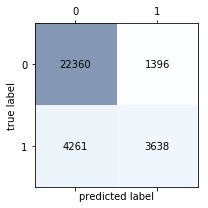

In [23]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)

# Podemos acceder a los valores de la matriz
tn, fp, fn, tp = confusion_matrix(y_train,y_pred).ravel()

ACC:  0.8212920549676197
SEN:  0.460564628433979
ESP:  0.941235898299377
PPV:  0.7226857369884784
FSC:  0.5625918193767881


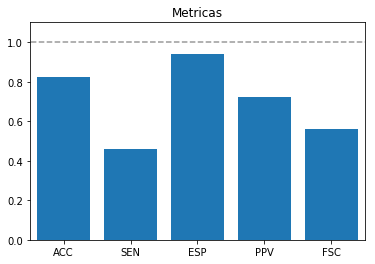

In [24]:
#calculamos métricas de training
calcula_metricas(confmat)

REGRESIÓN LOGÍSTICA : METRICAS DE CLASIFICACION PARA EL CONJUNTO TEST

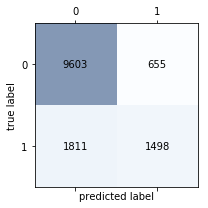

ACC:  0.8182354241910518
SEN:  0.45270474463584165
ESP:  0.9361473971534412
PPV:  0.6957733395262424
FSC:  0.5485170267301355


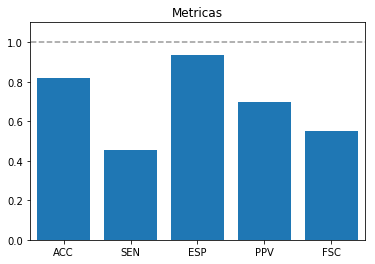

In [25]:
confmat_test = confusion_matrix(y_test,y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

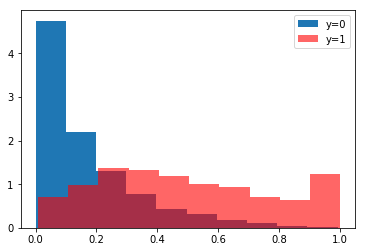

In [26]:
import warnings
warnings.filterwarnings('ignore')

y_prob = lr.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], normed = 1, label = 'y=0')
plt.hist(y_prob[idx_1], normed = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

Estos gráficos muestran la separación que hay entre las clases y el solapamiento que se produce entre ambas

REGRESIÓN LOGÍSTICA : CURVA ROC

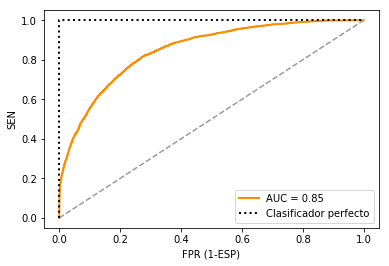

In [27]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

#### KNN

Es un algoritmo sencillo que como veremos nos proporciona buenos resultados. Para este algoritmo el parámetro principal es el número de vecinos que será el que optimizaremos para tener los mejores resultados. Por defecto, vamos a trabajar con la distancia euclídea que es la más conocida e intuitiva. 

Para cada modelo vamos a dividir entre trainig y test (este último será un 30% del dataset). Cambiaremos en cada ejecución las muestras cogidas para test mediante shuffle. Utilizaremos validación cruzada que nos permite barrer un conjunto elevado de muestras de training para después verificar los resultados en test. 

best mean cross-validation score: 0.835
best parameters: {'n_neighbors': 14}


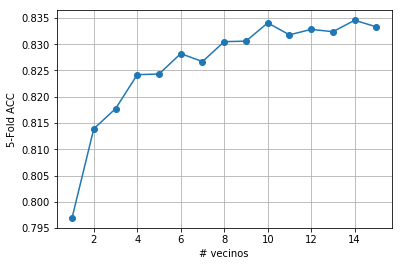

acc (test): 0.83


In [28]:
#detección de vecinos optimos con validación cruzada
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'n_neighbors':  np.arange(1, 16, 1)}
grid = GridSearchCV(KNeighborsClassifier(), scoring= 'accuracy', param_grid=param_grid, cv = 5, n_jobs=3)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) #¡cuidado, lo llaman test cuando es validación!
stdvalues = np.array(grid.cv_results_['std_test_score'])

nVecinos = range(1,16) # [1-15]

plt.plot(nVecinos,scores,'-o')
#plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

print("acc (test): {:.2f}".format(grid.score(Xs_test, y_test)))

KNN: METRICAS CLASIFICACIÓN

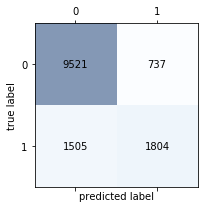

ACC:  0.8347460750350114
SEN:  0.5451798126322152
ESP:  0.9281536361863911
PPV:  0.70995670995671
FSC:  0.6167521367521367


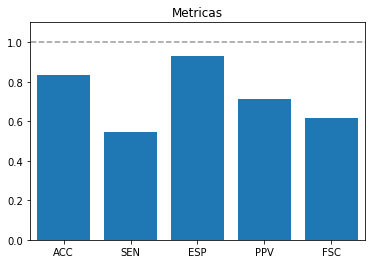

accuracy: 0.86
accuracy: 0.83


In [32]:
# Damos las prestaciones reales del modelo (en test)
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(Xs_train,y_train)
y_pred = knn.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

print("accuracy: {:.2f}".format(knn.score(Xs_train, y_train)))
print("accuracy: {:.2f}".format(knn.score(Xs_test, y_test)))

Vamos a poner un modelo más simple pero con las mismas prestaciones reduciendo el número de vecinos

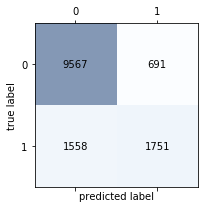

ACC:  0.8342301171961377
SEN:  0.5291628890903596
ESP:  0.9326379411191266
PPV:  0.717035217035217
FSC:  0.6089375760737262


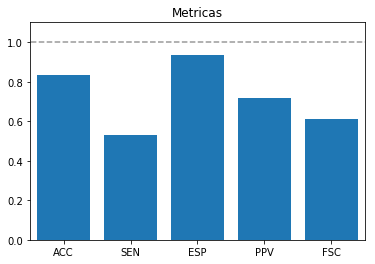

accuracy: 0.86
accuracy: 0.83


In [43]:
# Damos las prestaciones reales del modelo (en test)
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(Xs_train,y_train)
y_pred = knn.predict(Xs_test)

confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

print("accuracy: {:.2f}".format(knn.score(Xs_train, y_train)))
print("accuracy: {:.2f}".format(knn.score(Xs_test, y_test)))

Podemos observar que no nos encontramos en overfitting

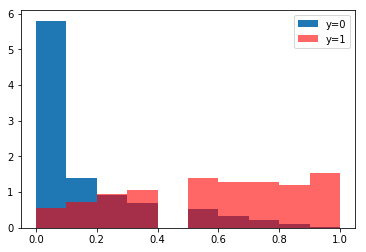

In [44]:
y_prob = knn.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], normed = 1, label = 'y=0')
plt.hist(y_prob[idx_1], normed = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

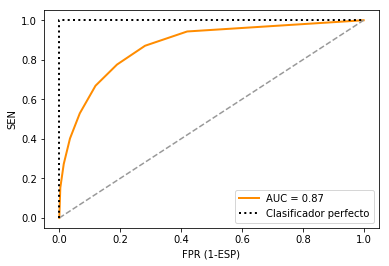

In [45]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Observamos que es un modelo que nos ha mejorado las prestaciones de regresión logística

#### ARBOLES DECISIÓN (CLASIFICACIÓN)

Vamos a utilizar primero un árbol de decisión, ya que este algoritmo me servirá de punto de partida para conocer los resultados de cara a aplicar algoritmos más complejos como puede ser Random Forest

best mean cross-validation score: 0.683
best parameters: {'max_depth': 9.0}
test-set score: 0.69


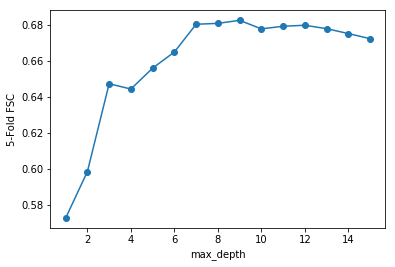

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

vectorMaxDepth = np.linspace(1, 15, 15)
param_grid = {'max_depth': vectorMaxDepth}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0,class_weight='balanced'), scoring= 'f1', param_grid=param_grid, cv = 5, n_jobs=3)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(X_test, y_test)))


scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(vectorMaxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-Fold FSC')
plt.show()

In [34]:
print(grid.best_params_)

{'max_depth': 9.0}


Este punto óptimo tiene buena pinta porque aumenta y después disminuye

In [35]:
# Damos las prestaciones reales del modelo (en test)

dt = DecisionTreeClassifier(max_depth= 8)
dt.fit(Xs_train,y_train)

print("accuracy: {:.2f}".format(dt.score(Xs_train, y_train)))
print("accuracy: {:.2f}".format(dt.score(Xs_test, y_test)))

accuracy: 0.86
accuracy: 0.85


Podemos observar que no estamos en overfitting

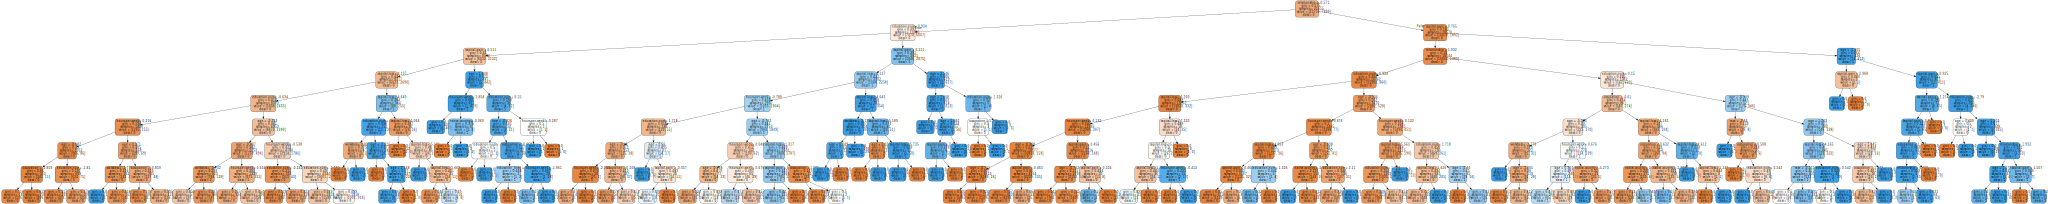

In [36]:

import graphviz
from sklearn.tree import export_graphviz


tree_dot = export_graphviz(dt, out_file=None, feature_names=features, class_names=['0','1'],  
                         filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(tree_dot) 
graph

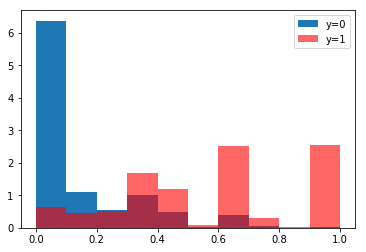

In [37]:
y_prob = dt.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], normed = 1, label = 'y=0')
plt.hist(y_prob[idx_1], normed = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

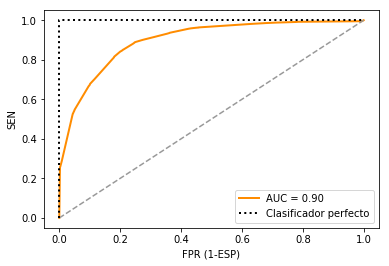

In [38]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Mejoramos las prestaciones de KNN

#### RANDOM FOREST

Para random forest tenemos el número de árboles que es n_estimators y la complejidad que lo medimos por la profundidad max_depth. Por defecto el criterio será gini.

best mean cross-validation score: 0.843
best parameters: {'max_depth': 24}


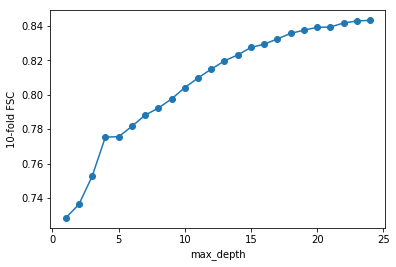

In [46]:
from sklearn.ensemble import RandomForestClassifier


# grid search
maxDepth = range(1,25)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt',class_weight='balanced'), param_grid=tuned_parameters,cv=10,n_jobs=3) 
grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold FSC')

plt.show()

In [47]:
# Damos las prestaciones reales del modelo (en test)

depthOpt = grid.best_params_['max_depth']

randomForest = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=depthOpt, max_features='sqrt').fit(Xs_train,y_train)
y_pred = randomForest.predict(Xs_test)

print('Random Forest Train: ', randomForest.score(Xs_train,y_train))
print('Random Forest Test: ', randomForest.score(Xs_test,y_test))

Random Forest Train:  0.9598483651871742
Random Forest Test:  0.8559740546915309


Observamos que se encuentra en overfitting, por lo que vamos a hacer el modelo más sencillo

In [66]:
# Damos las prestaciones reales del modelo (en test)

depthOpt = grid.best_params_['max_depth']

randomForest = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=13, max_features='sqrt').fit(Xs_train,y_train)
y_pred = randomForest.predict(Xs_test)

print('Random Forest Train: ', randomForest.score(Xs_train,y_train))
print('Random Forest Test: ', randomForest.score(Xs_test,y_test))

Random Forest Train:  0.8835570999842047
Random Forest Test:  0.861354757868357


Podemos observar que no estamos en overfitting

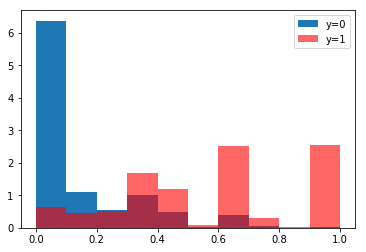

In [67]:
y_prob = dt.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], normed = 1, label = 'y=0')
plt.hist(y_prob[idx_1], normed = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

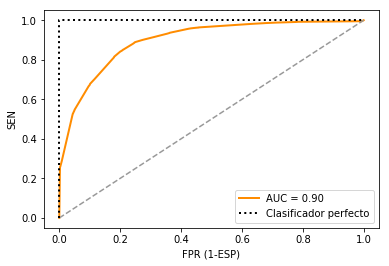

In [68]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Obtenemos resultados similares a Decission Tree

**BOOSTED TREE**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier


Niterations = [25,50,75,100,125,150,175,200,300]
learningRate = [0.5,0.1,0.05,0.01]
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=2), param_grid=param_grid, cv = 5, n_jobs=3)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.868
best parameters: {'n_estimators': 300, 'learning_rate': 0.5}


In [70]:
# Damos las prestaciones reales del modelo (en test)


bt = GradientBoostingClassifier(learning_rate= 0.5, n_estimators= 300).fit(Xs_train,y_train)
y_pred = bt.predict(Xs_test)

print('Random Boosted Tree Train: ', bt.score(Xs_train,y_train))
print('Random Boosted Tree Test: ', bt.score(Xs_test,y_test))

Random Boosted Tree Train:  0.8893697678091929
Random Boosted Tree Test:  0.870863123756173


Comprobamos que no tenemos overfitting

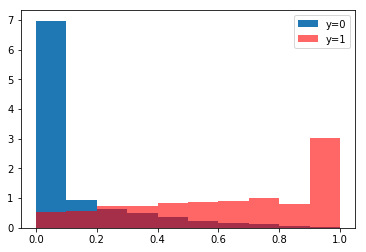

In [71]:
y_prob = bt.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], normed = 1, label = 'y=0')
plt.hist(y_prob[idx_1], normed = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

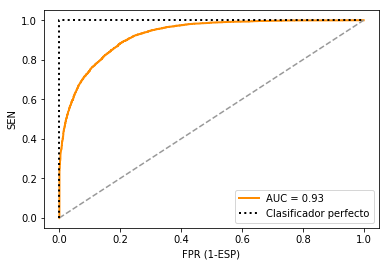

In [72]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

Este es el mejor modelo de todos los que hemos probado

# REGRESION

In [73]:
diamond = pd.read_csv("../Práctica/diamonds.csv") # cargamos fichero
diamond.head(5) 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [74]:
diamond.shape

(53940, 11)

(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <a list of 10 Patch objects>)

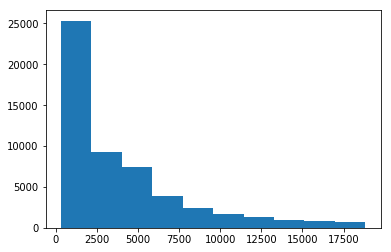

In [75]:
plt.hist(diamond['price'])

Eliminamos la columna unnamed

In [76]:
diamond = diamond.drop(diamond.columns[[0]], axis=1)

In [77]:
diamond.shape

(53940, 10)

Al mirar el histograma observamos que se trata de un problema de regresión

In [78]:
print(pd.notnull(diamond['carat']).values.ravel().sum())
print(pd.notnull(diamond['cut']).values.ravel().sum())
print(pd.notnull(diamond['color']).values.ravel().sum())
print(pd.notnull(diamond['clarity']).values.ravel().sum())
print(pd.notnull(diamond['depth']).values.ravel().sum())
print(pd.notnull(diamond['table']).values.ravel().sum())
print(pd.notnull(diamond['price']).values.ravel().sum())
print(pd.notnull(diamond['x']).values.ravel().sum())
print(pd.notnull(diamond['y']).values.ravel().sum())
print(pd.notnull(diamond['z']).values.ravel().sum())

53940
53940
53940
53940
53940
53940
53940
53940
53940
53940


La comprobación anterior nos indica que no tenemos missing values en el dataset

Vamos a codificar las variables categóricas

In [79]:
le = LabelEncoder()

diamond['cut'] = le.fit_transform(diamond['cut'])
diamond['color'] = le.fit_transform(diamond['color'])
diamond['clarity'] = le.fit_transform(diamond['clarity'])

In [80]:
diamond.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Comprobamos que no tenemos string, y que podemos trabajar con los datos

In [81]:
diamond.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.027708,1.701105,1.724591,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [82]:
diamond.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


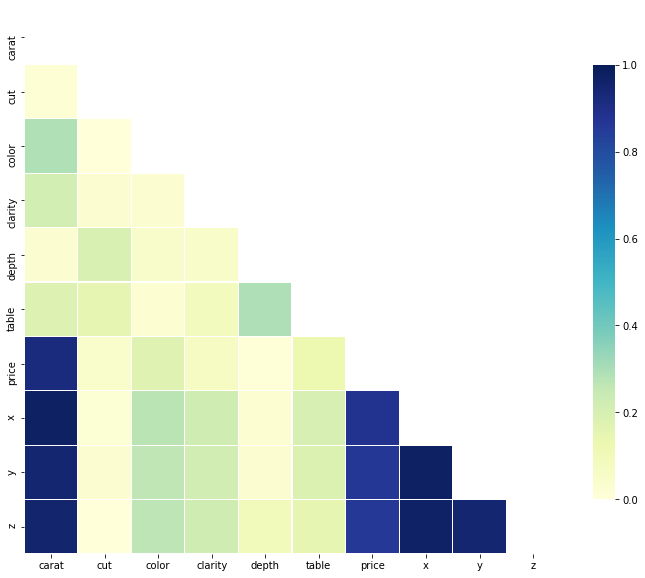

In [83]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(diamond.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

En esta figura se puede observar que existe gran correlación entre algunas de las variables. Esta figura, junto con la matriz de correlación nos llevan a eliminar aquellas features que están muy correlacionadas : x, y z están muy correlacionadas con carat

In [84]:
diamond = diamond.drop(diamond.columns[[7,8,9]], axis=1)

A continuación, vamos a mostrar un gráfico con las relaciones que existen entre todas las variables

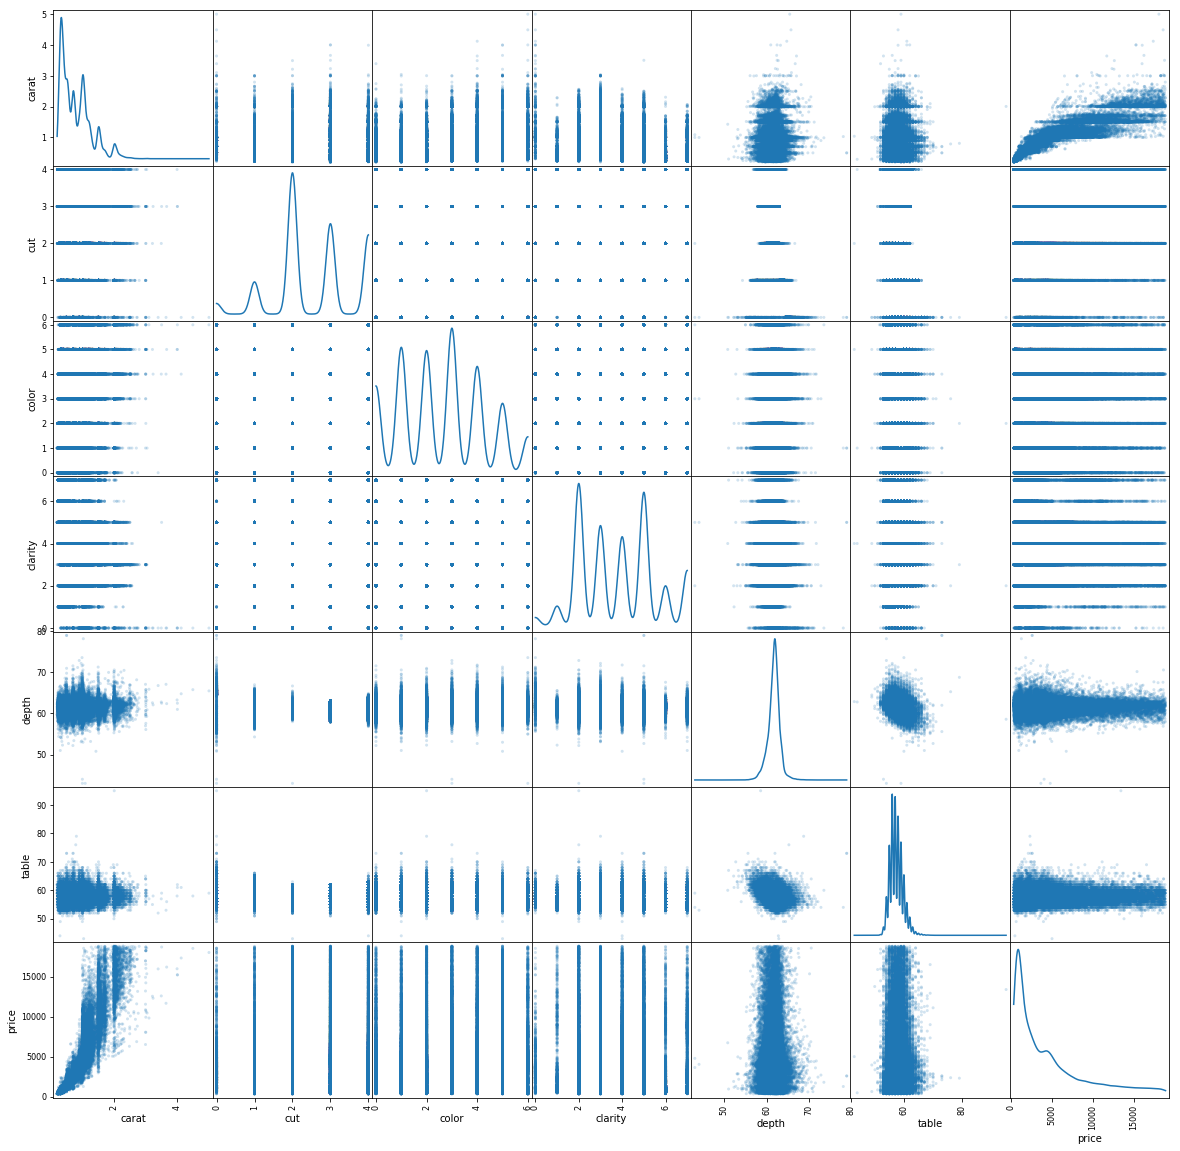

In [85]:
pd.plotting.scatter_matrix(diamond, alpha=0.2,figsize=(20,20),diagonal='kde')
plt.show()

En el dibujo anterior podemos ver que entre carat y la variable price aumenta de forma exponencial, por lo que al hacer logarítmicas ambas columnas nos proporcionará que aumenten su linealidad y que de esta forma mejoren su comportamiento en los modelos

In [86]:
diamond['price'] = np.log(diamond['price'])
diamond['carat'] = np.log(diamond['carat'])

Dibujamos de nuevo para ver si se confirma lo que pensábamos

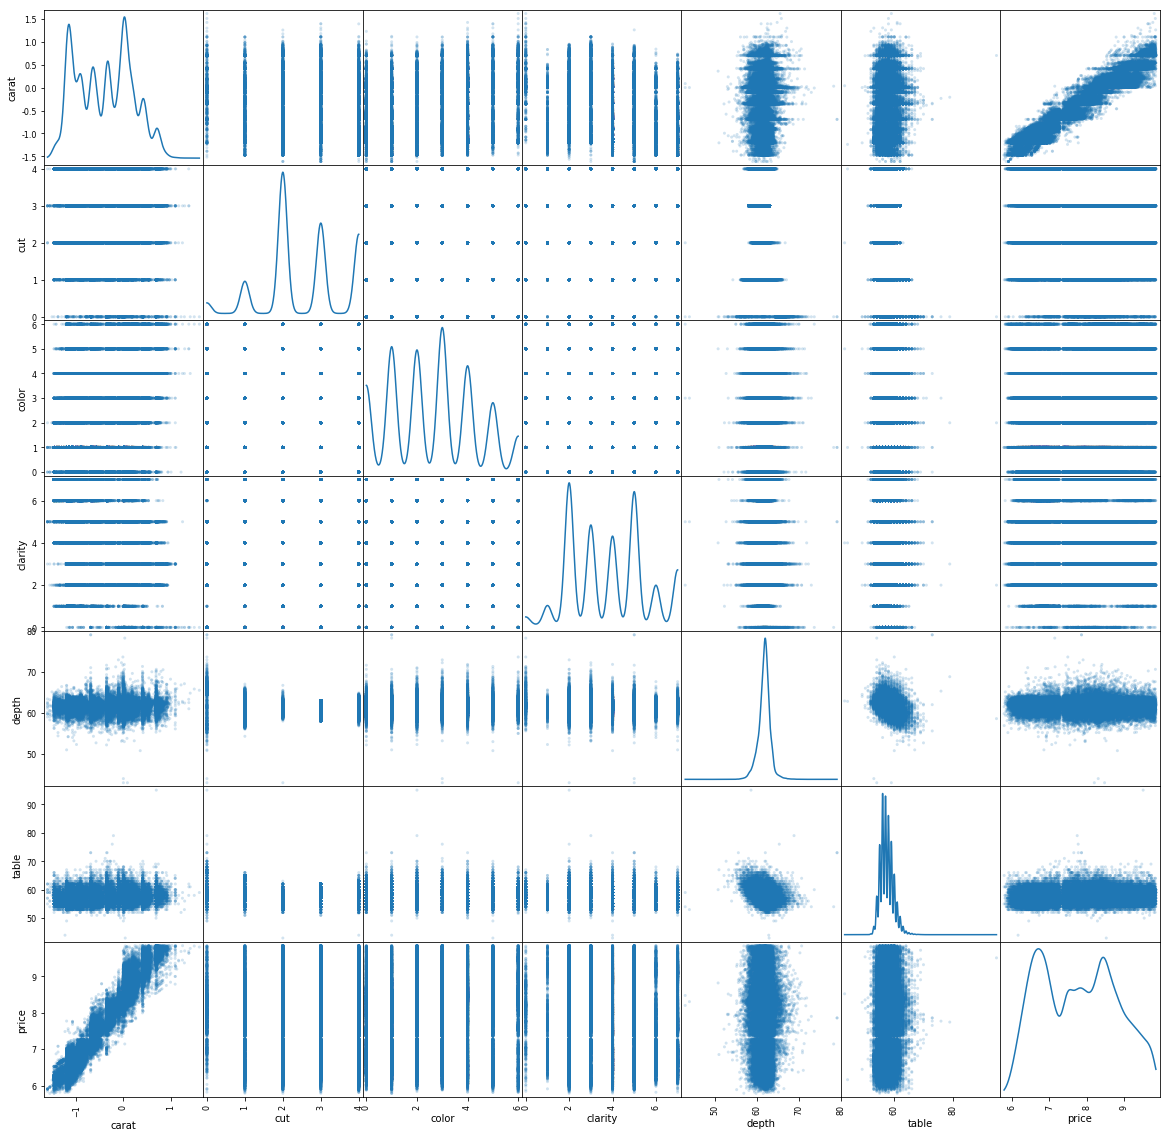

In [87]:
pd.plotting.scatter_matrix(diamond, alpha=0.2,figsize=(20,20),diagonal='kde')
plt.show()

Tal y como pensábamos la relación que pasan a tener las variables es mucho más lineal

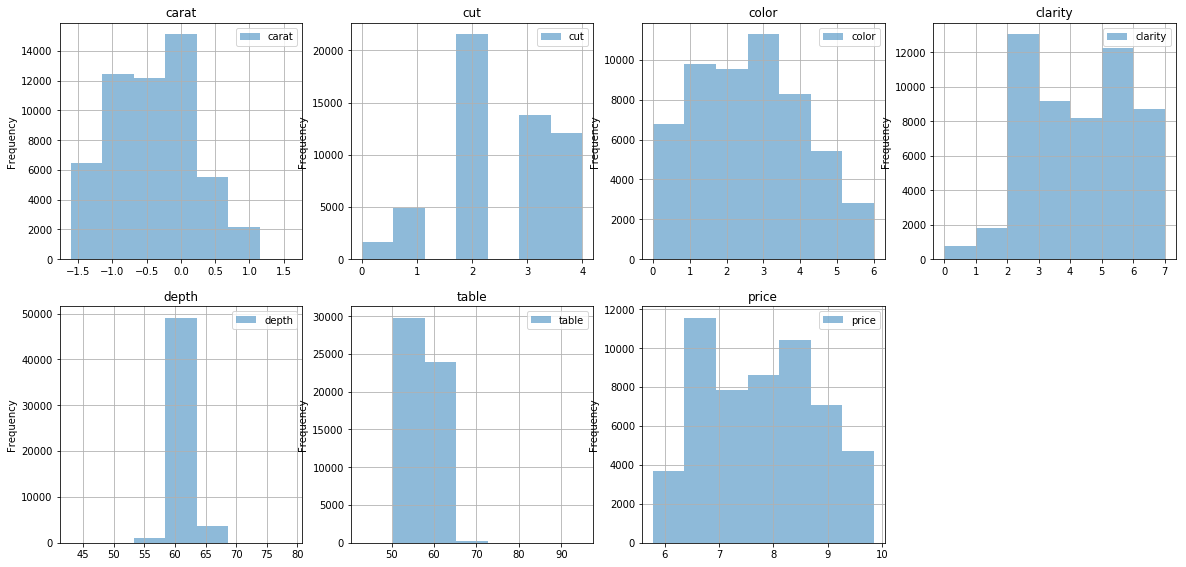

In [88]:
plt.figure(figsize = (20, 20))

for i, feature in enumerate(diamond.columns):
    plt.subplot(4, 4, i + 1)
    diamond[feature].plot.hist(alpha = 0.5, bins = 7, grid = True)
    plt.legend()
    plt.title(feature)

plt.show()

SEPARAMOS ENTRE TRAIN/TEST

In [89]:
#preparamos datos
from sklearn.model_selection import train_test_split
features = diamond.columns.drop(['price'])

X = diamond[features].as_matrix() 
y = diamond['price'].as_matrix()


#P1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state=0)

scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

#### REGRESIÓN LINEAL

Vamos a crear y entrenar un modelo de regresión lineal

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


feature_names = diamond.columns[1:]

lr2 = LinearRegression()
lr2.fit(Xs_train,y_train)


y_pred_train = lr2.predict(Xs_train)
y_pred_test = lr2.predict(Xs_test)

mseTrainModelLR = mean_squared_error(y_train,y_pred_train)
mseTestModelLR = mean_squared_error(y_test,y_pred_test)


print('MSE Modelo Lineal Simple (train): %0.7g' % mseTrainModelLR)
print('MSE Modelo Lineal Simple (test) : %0.7g' % mseTestModelLR)
print("R^2 (train): {:.4f}".format(lr2.score(Xs_train, y_train)))
print("R^2 (test): {:.4f}".format(lr2.score(Xs_test, y_test)))


w = lr2.coef_
for f, wi in zip(feature_names, w):
    print(f, wi)

MSE Modelo Lineal Simple (train): 0.0443593
MSE Modelo Lineal Simple (test) : 0.04366244
R^2 (train): 0.9568
R^2 (test): 0.9578
cut 1.0419025319756954
color 0.007110080414767041
clarity -0.1083093854226842
depth 0.11474804128322627
table -0.028620344550089515
price -0.036858709440135196


Comprobamos que no tenemos overfitting y tenemos unos buenos resultados

**RIDGE**

Esta regularización afecta a todos los coeficientes, y es un buen punto de partida para analizar el problema

best mean cross-validation score: -0.044
best parameters: {'alpha': 0.2872984833353664}


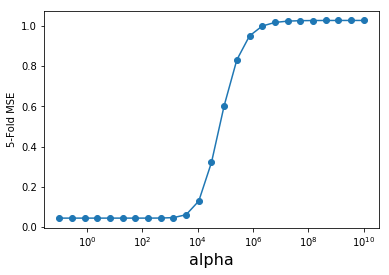

In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error



alpha_vector = np.logspace(-1,10,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, n_jobs=3)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((0, 1))
plt.show()

El parámetro libre de Ridge es alpha, que después de aplicar GridSearchCV me da como óptimo el indicado arriba. Podemos observar que es muy cercano a cero, y si alpha aumenta se produce un aumento del MSE. 

In [93]:
alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(Xs_train,y_train)

# predicción
ytrainRidge = ridge.predict(Xs_train)
ytestRidge = ridge.predict(Xs_test)
w = ridge.coef_
norm_w2 = np.dot(w,w.T)


mseTrainModelRidge = mean_squared_error(y_train,ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test,ytestRidge)

print('MSE Modelo Ridge (train): %0.7g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.7g' % mseTestModelRidge)
print("R^2 (train): {:.4f}".format(ridge.score(Xs_train, y_train)))
print("R^2 (test): {:.4f}".format(ridge.score(Xs_test, y_test)))

w = ridge.coef_
for f, wi in zip(feature_names, w):
    print(f, wi)



MSE Modelo Ridge (train): 0.0443593
MSE Modelo Ridge (test) : 0.04366249
R^2 (train): 0.9568
R^2 (test): 0.9578
cut 1.0418926730444178
color 0.007110090215887343
clarity -0.10830616449638565
depth 0.1147451703822145
table -0.028619506917922463
price -0.03685665662499667


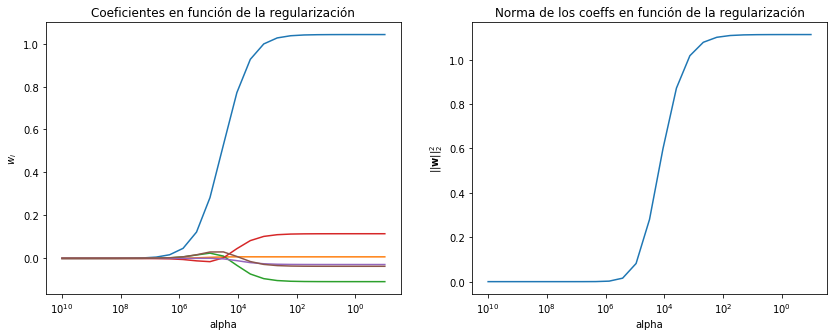

In [94]:
from sklearn.linear_model import Ridge

n_alphas = 20
#alphas = np.logspace(-10, -16, n_alphas)
alphas = np.logspace(-1,10,25)


coefs = []
norm2_coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(Xs_train,y_train)
    coefs.append(ridge.coef_)
    norm2_coefs.append(np.dot(ridge.coef_,ridge.coef_.T))

# Display results
plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$w_i$')
plt.title('Coeficientes en función de la regularización')
plt.axis('tight')


ax = plt.subplot(1, 2, 2)
ax.plot(alphas, norm2_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||\mathbf{w}||^2_2$')
plt.title('Norma de los coeffs en función de la regularización')
plt.axis('tight')
plt.show()

Aquí se puede observar los diferentes valores que toman los coeficientes en función de alpha

**LASSO**

best mean cross-validation score: -0.044
best parameters: {'alpha': 1.5264179671752335e-05}
5-fold val score: -17.24


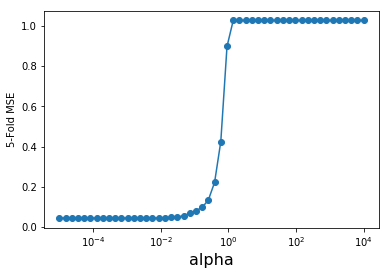

MSE Modelo Lasso (train): 0.0443593
MSE Modelo Lasso (test) : 0.04366254
R^2 (train): 0.9568275
R^2 (test): 0.9577801
[ 1.04187658  0.00709825 -0.10828994  0.11473189 -0.0286001  -0.03683278]
cut 1.0418765835424446
color 0.007098252453514045
clarity -0.10828993619896482
depth 0.11473189280458891
table -0.028600101913685286
price -0.03683277787833962


In [95]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')



alpha_vector = np.logspace(-5,4,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10,n_jobs=3)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("5-fold val score: {:.2f}".format(grid.score(X_test, y_test)))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((0, 1))
plt.show()


#entrenar con alpha optimo
alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(Xs_train,y_train)

# predicción
ytrainLasso = lasso.predict(Xs_train)
ytestLasso = lasso.predict(Xs_test)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)


mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.7g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.7g' % mseTestModelLasso)
print("R^2 (train): {:.7f}".format(lasso.score(Xs_train, y_train)))
print("R^2 (test): {:.7f}".format(lasso.score(Xs_test, y_test)))

print(lasso.coef_)
w = lasso.coef_
for f, wi in zip(feature_names, w):
    print(f, wi)

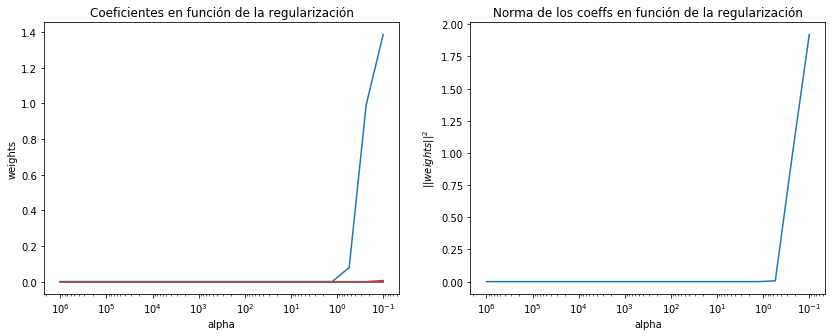

In [96]:
n_alphas = 20
alphas = np.logspace(-1, 6, n_alphas)

coefs = []

norm2_coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)
    norm2_coefs.append(np.dot(lasso.coef_,lasso.coef_.T))

# Display results

plt.figure(figsize=(14, 5))

ax = plt.subplot(1, 2, 1)
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coeficientes en función de la regularización')
plt.axis('tight')


ax = plt.subplot(1, 2, 2)
ax.plot(alphas, norm2_coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('$||weights||^2$')
plt.title('Norma de los coeffs en función de la regularización')
plt.axis('tight')
plt.show()


Como podemos observar el mse y el r^2 de Ridge y de Lasso salen muy parecidos a la regresión lineal original debido a que las alphas que nos salen son muy cercanas a cero. 

En una de las pruebas realizadas para selección de features realizada anteriormente (cuando teníamos todas las variables del dataset) y aplicando Lasso, nos ha indicado la conveniencia de eliminar las variables x,y,z que son las que hemos eliminado

**DECISION TREE**

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score



depth_vector = range(5,20)
param_grid = {'max_depth': depth_vector }
grid = GridSearchCV(DecisionTreeRegressor(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5,n_jobs=3)

grid.fit(Xs_train, y_train)

grid.best_params_

{'max_depth': 12}

In [118]:
dt = DecisionTreeRegressor(max_depth=12).fit(Xs_train,y_train)

ytrainDT = dt.predict(Xs_train)
ytestDT  = dt.predict(Xs_test)
mseTrainModelDT = mean_squared_error(y_train,ytrainDT)
mseTestModelDT = mean_squared_error(y_test,ytestDT)

print('MSE Modelo DT (train): %0.9g' % mseTrainModelDT)
print('MSE Modelo DT (test) : %0.9g' % mseTestModelDT)
print("R^2 (train): {:.2f}".format(dt.score(Xs_train, y_train)))
print("R^2 (test): {:.2f}".format(dt.score(Xs_test, y_test)))

MSE Modelo DT (train): 0.00900194691
MSE Modelo DT (test) : 0.0129465008
R^2 (train): 0.99
R^2 (test): 0.99


Debido a que vemos que existe diferencia entre los mse de train y test mayor a los otros modelos, vamos a simplificar el modelo

In [142]:
dt = DecisionTreeRegressor(max_depth=6).fit(Xs_train,y_train)

ytrainDT = dt.predict(Xs_train)
ytestDT  = dt.predict(Xs_test)
mseTrainModelDT = mean_squared_error(y_train,ytrainDT)
mseTestModelDT = mean_squared_error(y_test,ytestDT)

print('MSE Modelo DT (train): %0.9g' % mseTrainModelDT)
print('MSE Modelo DT (test) : %0.9g' % mseTestModelDT)
print("R^2 (train): {:.2f}".format(dt.score(Xs_train, y_train)))
print("R^2 (test): {:.2f}".format(dt.score(Xs_test, y_test)))

MSE Modelo DT (train): 0.0322319668
MSE Modelo DT (test) : 0.0321135284
R^2 (train): 0.97
R^2 (test): 0.97


Vemos que el modelo llega a unas prestaciones mejores a la regresión lineal

**RANDOM FOREST**

In [121]:
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200),
              param_grid={'max_depth': range(2, 10)},
              scoring='neg_mean_squared_error', cv=5, refit=True, n_jobs=3)


grid.fit(Xs_train, y_train)

grid.best_params_

{'max_depth': 9}

In [122]:
rf = RandomForestRegressor(n_estimators = 200, max_depth = 9).fit(Xs_train,y_train)

ytrainRF = rf.predict(Xs_train)
ytestRF  = rf.predict(Xs_test)
mseTrainModelRF = mean_squared_error(y_train,ytrainRF)
mseTestModelRF = mean_squared_error(y_test,ytestRF)

print('MSE Modelo RF (train): %0.7g' % mseTrainModelRF)
print('MSE Modelo RF (test) : %0.7g' % mseTestModelRF)
print("R^2 (train): {:.2f}".format(rf.score(Xs_train, y_train)))
print("R^2 (test): {:.2f}".format(rf.score(Xs_test, y_test)))

MSE Modelo RF (train): 0.01322299
MSE Modelo RF (test) : 0.01423856
R^2 (train): 0.99
R^2 (test): 0.99


Debido a que vemos que existe diferencia entre los mse de train y test mayor a los otros modelos, vamos a simplificar el modelo

In [144]:
rf = RandomForestRegressor(n_estimators = 200, max_depth = 7).fit(Xs_train,y_train)

ytrainRF = rf.predict(Xs_train)
ytestRF  = rf.predict(Xs_test)
mseTrainModelRF = mean_squared_error(y_train,ytrainRF)
mseTestModelRF = mean_squared_error(y_test,ytestRF)

print('MSE Modelo RF (train): %0.7g' % mseTrainModelRF)
print('MSE Modelo RF (test) : %0.7g' % mseTestModelRF)
print("R^2 (train): {:.2f}".format(rf.score(Xs_train, y_train)))
print("R^2 (test): {:.2f}".format(rf.score(Xs_test, y_test)))

MSE Modelo RF (train): 0.02123115
MSE Modelo RF (test) : 0.02160075
R^2 (train): 0.98
R^2 (test): 0.98


Nos da un resultado mejor que decission tree

**GRADIENT BOOSTING**

In [101]:

param_grid={'n_estimators':[100],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,6],
            'min_samples_leaf':[3,5,9,17],
            'max_features':[1.0,0.3,0.1] } 
grid = GridSearchCV(GradientBoostingRegressor(), cv=5, scoring ='neg_mean_squared_error', param_grid=param_grid, n_jobs=3)

grid.fit(Xs_train, y_train)

print ("Best Estimator learned through GridSearch") 
print (grid.best_params_)

Best Estimator learned through GridSearch
{'min_samples_leaf': 3, 'max_features': 1.0, 'max_depth': 6, 'n_estimators': 100, 'learning_rate': 0.1}


In [150]:
GB = GradientBoostingRegressor(learning_rate= 0.1, min_samples_leaf= 3, max_features= 0.5, n_estimators= 200, max_depth=5 )

GB.fit(Xs_train, y_train)

ytrainGB = GB.predict(Xs_train)
ytestGB  = GB.predict(Xs_test)
mseTrainModelGB = mean_squared_error(y_train,ytrainGB)
mseTestModelGB = mean_squared_error(y_test,ytestGB)

print('MSE Modelo GB (train): %0.9g' % mseTrainModelGB)
print('MSE Modelo GB (test) : %0.9g' % mseTestModelGB)
print("R^2 (train): {:.9f}".format(GB.score(Xs_train, y_train)))
print("R^2 (test): {:.9f}".format(GB.score(Xs_test, y_test)))

MSE Modelo GB (train): 0.00921425148
MSE Modelo GB (test) : 0.00975164325
R^2 (train): 0.991032261
R^2 (test): 0.990570561


Este nos ofrece el mejor resultado de todos con una diferencia entre los mse muy pequeña